In [1]:
# Llamar las librerias

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from dateutil.relativedelta import relativedelta
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.base import clone

In [2]:
# Importar las bases de datos

bd_clientes = pd.read_csv("base_clientes_final.csv")
bd_transacciones = pd.read_csv("base_transacciones_final.csv")

In [3]:
bd_clientes.head()

,id,fecha_nacimiento,fecha_alta,id_municipio,id_estado,tipo_persona,genero,actividad_empresarial
0,9980f12e32711330d5f58460e169e6207afda041,1984-06-19,2015-10-25,6822006,68,Persona Fisica Sin Actividad Empresarial,,EMPLEADO DEL SECTOR SERVICIOS
1,93512ea145c3d81ba7a7ff641faf992fd307072e,1986-12-21,2018-02-11,6822014,68,Persona Fisica Con Actividad Empresarial,F,COMPRAVENTA DE ARTICULOS DE FERRETERIA
2,acb2fee5aea2d73a88359d438aaedeea731554f8,1991-02-01,2019-05-12,6115121,61,Persona Fisica Con Actividad Empresarial,M,AGENCIA DE PUBLICIDAD
3,b627227d2f20116510bcb12de34e6a188cf8d054,1994-05-23,2017-07-19,6923005,69,Persona Fisica Sin Actividad Empresarial,F,COMPRA VENTA DE ARTICULOS NO CLASIFICADOS EN O...
4,054be5f40d50b28d2b82af57159343989dd28012,1990-10-03,2017-05-21,6014120,60,Persona Fisica Sin Actividad Empresarial,M,EMPLEADO DEL SECTOR SERVICIOS


In [4]:
bd_transacciones.head()

,id,fecha,comercio,giro_comercio,tipo_venta,monto
0,91477f382c3cf63ab5cd9263b502109243741158,2022-01-02,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,5.99
1,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,RAPPI,SERVICIOS EMPRESARIALES - NO CLASIFICADOS,digital,13.01
2,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,RAPPI,SERVICIOS EMPRESARIALES - NO CLASIFICADOS,digital,15.84
3,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,8.17
4,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,2.54


In [5]:
bd_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1000 non-null   object
 1   fecha_nacimiento       1000 non-null   object
 2   fecha_alta             1000 non-null   object
 3   id_municipio           1000 non-null   int64 
 4   id_estado              1000 non-null   int64 
 5   tipo_persona           1000 non-null   object
 6   genero                 1000 non-null   object
 7   actividad_empresarial  1000 non-null   object
dtypes: int64(2), object(6)
memory usage: 62.6+ KB


In [6]:
bd_clientes['fecha_nacimiento'] = pd.to_datetime(bd_clientes['fecha_nacimiento'], errors='coerce')
bd_clientes['fecha_alta'] = pd.to_datetime(bd_clientes['fecha_alta'], errors='coerce')

In [7]:
bd_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346011 entries, 0 to 346010
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             346011 non-null  object 
 1   fecha          346011 non-null  object 
 2   comercio       346011 non-null  object 
 3   giro_comercio  340423 non-null  object 
 4   tipo_venta     346011 non-null  object 
 5   monto          346011 non-null  float64
dtypes: float64(1), object(5)
memory usage: 15.8+ MB


In [8]:
bd_transacciones['fecha'] = pd.to_datetime(bd_transacciones['fecha'], errors='coerce')

In [9]:
bd_clientes.isna().sum()

id                       0
fecha_nacimiento         0
fecha_alta               0
id_municipio             0
id_estado                0
tipo_persona             0
genero                   0
actividad_empresarial    0
dtype: int64

In [10]:
bd_transacciones.isna().sum()

id                  0
fecha               0
comercio            0
giro_comercio    5588
tipo_venta          0
monto               0
dtype: int64

In [11]:
bd_clientes.describe()

,fecha_nacimiento,fecha_alta,id_municipio,id_estado
count,1000,1000,1.000000e+03,1000.00000
mean,1986-12-02 20:35:31.200000,2019-11-01 05:44:09.600000,6.180282e+06,61.64600
min,1898-01-01 00:00:00,2014-06-20 00:00:00,4.701001e+06,47.00000
25%,1982-09-22 18:00:00,2019-03-11 00:00:00,5.509015e+06,55.00000
50%,1988-08-22 00:00:00,2019-11-10 12:00:00,6.115109e+06,61.00000
75%,1993-06-18 06:00:00,2020-08-11 06:00:00,6.519046e+06,65.00000
max,2003-02-11 00:00:00,2023-05-08 00:00:00,7.832056e+06,78.00000
std,NaN,NaN,7.094854e+05,7.02453


In [12]:
bd_transacciones.describe()

,fecha,monto
count,346011,346011.000000
mean,2022-07-26 06:28:22.288077312,42.290700
min,2022-01-01 00:00:00,1.390000
25%,2022-04-20 00:00:00,9.320000
50%,2022-07-31 00:00:00,17.930000
75%,2022-11-03 00:00:00,39.430000
max,2023-01-30 00:00:00,2297.880000
std,NaN,94.554414


In [13]:
bd_transacciones.columns

Index(['id', 'fecha', 'comercio', 'giro_comercio', 'tipo_venta', 'monto'], dtype='object')

In [14]:
# Corregir los nombres del comercio

reemplazos = {
    'SMARTFIT': 'SMART FIT',
    'SMART FIT': 'SMART FIT',
    'TOTAL PLAY': 'TOTALPLAY',
    'TOTALPLAY': 'TOTALPLAY',
    'GOOGLE YOUTUBE': 'GOOGLE',
    'DIDI FOOD': 'DIDIFOOD',
    'DIDIFOOD': 'DIDIFOOD',
    'WAL-MART': 'WALMART',
    'MERCADOPAGO': 'MERCADO PAGO',
    'MI ATT': 'AT&T',
    'ATT': 'AT&T',
    'TOTALPASS': 'TOTAL PASS',
    '7 ELEVEN': '7ELEVEN'
}
bd_transacciones['comercio'] = bd_transacciones['comercio'].replace(reemplazos)

In [15]:
comercios_digitales = [
    'ALIEXPRESS',
    'AMAZON',
    'AMAZON PRIME',
    'APPLE',
    'AUDIBLE',
    'CRUNCHYROLL',
    'GOOGLE',
    'GOOGLE AMAZON MOBILE',
    'GOOGLE ONE',
    'GOOGLE YOUTUBE',
    'GOOGLE YOUTUBEPREMIUM',
    'PLAYSTATION NETWORK',
    'WALMART'
]

mascara_comercio = bd_transacciones['comercio'].isin(comercios_digitales)

mascara_giro_vacio = bd_transacciones['giro_comercio'].isnull() | (bd_transacciones['giro_comercio'] == '')

mascara_final = mascara_comercio & mascara_giro_vacio

bd_transacciones.loc[mascara_final, 'giro_comercio'] = 'Comercio Digital'

print(bd_transacciones)

                                              id      fecha  comercio  \
0       91477f382c3cf63ab5cd9263b502109243741158 2022-01-02    AMAZON   
1       91477f382c3cf63ab5cd9263b502109243741158 2022-01-05     RAPPI   
2       91477f382c3cf63ab5cd9263b502109243741158 2022-01-05     RAPPI   
3       91477f382c3cf63ab5cd9263b502109243741158 2022-01-05    AMAZON   
4       91477f382c3cf63ab5cd9263b502109243741158 2022-01-05    AMAZON   
...                                          ...        ...       ...   
346006  710f13196a0f9109e22bc73c2fe76f22fbef3dc1 2023-01-26  OXXO GAS   
346007  710f13196a0f9109e22bc73c2fe76f22fbef3dc1 2023-01-27       HEB   
346008  710f13196a0f9109e22bc73c2fe76f22fbef3dc1 2023-01-29      OXXO   
346009  710f13196a0f9109e22bc73c2fe76f22fbef3dc1 2023-01-29  DIDIFOOD   
346010  710f13196a0f9109e22bc73c2fe76f22fbef3dc1 2023-01-30       HEB   

                                            giro_comercio tipo_venta   monto  
0              COMERCIOS ELECTRONICOS (VTAS 

Predicción

In [16]:
bd_transacciones

,id,fecha,comercio,giro_comercio,tipo_venta,monto
0,91477f382c3cf63ab5cd9263b502109243741158,2022-01-02,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,5.99
1,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,RAPPI,SERVICIOS EMPRESARIALES - NO CLASIFICADOS,digital,13.01
2,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,RAPPI,SERVICIOS EMPRESARIALES - NO CLASIFICADOS,digital,15.84
3,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,8.17
4,91477f382c3cf63ab5cd9263b502109243741158,2022-01-05,AMAZON,COMERCIOS ELECTRONICOS (VTAS POR INTERNET),digital,2.54
...,...,...,...,...,...,...
346006,710f13196a0f9109e22bc73c2fe76f22fbef3dc1,2023-01-26,OXXO GAS,"ESTACIONES DE SERVICIO, GASOLINERIAS TODO TRAN...",fisica,172.57
346007,710f13196a0f9109e22bc73c2fe76f22fbef3dc1,2023-01-27,HEB,4121,fisica,19.30
346008,710f13196a0f9109e22bc73c2fe76f22fbef3dc1,2023-01-29,OXXO,"TIENDAS DE CONVENIENCIA, MINISUPER",fisica,4.66
346009,710f13196a0f9109e22bc73c2fe76f22fbef3dc1,2023-01-29,DIDIFOOD,COMIDA RAPIDA,digital,20.63


In [17]:
# Preparar columna de mes
bd_transacciones['mes'] = pd.to_datetime(bd_transacciones['fecha']).dt.to_period('M')


In [18]:
trans = bd_transacciones.copy()
clientes = bd_clientes.copy()

In [19]:
# Creación variables
trans['mes'] = trans['fecha'].dt.to_period('M').dt.to_timestamp()
monthly = (
    trans
    .groupby(['id', 'mes'])['monto']
    .sum()
    .reset_index()
    .sort_values(['id', 'mes'])
    .rename(columns={'id':'cliente_id'})
)

In [20]:
# Pivot para tipo de venta
tipo_venta_pivot = (
    pd.crosstab(
        index=[trans['id'], trans['mes']],
        columns=trans['tipo_venta'],
        normalize='index'
    )
    .reset_index()
    .rename(columns={col: f"prop_{col.lower()}"
                     for col in pd.crosstab(
                         index=[trans['id'], trans['mes']],
                         columns=trans['tipo_venta']
                     ).columns})
)

In [21]:
monthly = (
    monthly
    .merge(tipo_venta_pivot, left_on=['cliente_id','mes'], right_on=['id','mes'], how='left')
    .drop(columns=['id'])
)

In [22]:
# Agregar datos demográficos

clientes = bd_clientes.copy()
clientes['fecha_nacimiento'] = pd.to_datetime(clientes['fecha_nacimiento'], errors='coerce')
clientes['fecha_alta']       = pd.to_datetime(clientes['fecha_alta'], errors='coerce')
hoy = pd.to_datetime('today')

clientes['edad'] = clientes['fecha_nacimiento'].apply(
    lambda x: (hoy - x).days // 365 if pd.notnull(x) else np.nan
)

In [23]:
from dateutil.relativedelta import relativedelta
clientes['antiguedad_meses'] = clientes['fecha_alta'].apply(
    lambda x: (relativedelta(hoy, x).years * 12 + relativedelta(hoy, x).months)
    if pd.notnull(x) else np.nan
)

monthly = monthly.merge(
    clientes[['id','edad','antiguedad_meses']],
    left_on='cliente_id', right_on='id', how='left'
).drop(columns=['id'])

In [24]:
# Feature engineering
def create_time_features(df, trans_df):
    df = df.copy()
    df['lag_1'] = df.groupby('cliente_id')['monto'].shift(1)
    df['lag_2'] = df.groupby('cliente_id')['monto'].shift(2)
    df['roll_mean_3'] = (
        df.groupby('cliente_id')['monto']
          .shift(1)
          .rolling(3)
          .mean()
          .reset_index(0, drop=True)
    )
    df['roll_std_3'] = (
        df.groupby('cliente_id')['monto']
          .shift(1)
          .rolling(3)
          .std()
          .reset_index(0, drop=True)
    )
    # Recencia
    last_purchase = (
        trans_df
        .groupby('id')['fecha']
        .max()
        .reset_index()
        .rename(columns={'id':'cliente_id','fecha':'ultima_fecha'})
    )
    df = df.merge(last_purchase, on='cliente_id', how='left')
    df['recencia'] = (df['mes'] + pd.offsets.MonthEnd(0) - df['ultima_fecha']).dt.days
    # Frecuencia trimestral y mediana monetaria
    freq = (
        trans_df
        .groupby(['id', trans_df['fecha'].dt.to_period('Q')])['monto']
        .count()
        .reset_index()
    )
    freq_q = (
        freq
        .groupby('id')['monto']
        .mean()
        .reset_index()
        .rename(columns={'id':'cliente_id','monto':'freq_trimestral'})
    )
    df = df.merge(freq_q, on='cliente_id', how='left')
    mono = (
        trans_df
        .groupby('id')['monto']
        .median()
        .reset_index()
        .rename(columns={'id':'cliente_id','monto':'median_monto'})
    )
    df = df.merge(mono, on='cliente_id', how='left')
    # Calendario
    df['mes_num'] = df['mes'].dt.month
    df['es_trimestre_final'] = df['mes_num'].isin([3,6,9,12]).astype(int)

    return df.drop(columns=['ultima_fecha'])

data = create_time_features(monthly, trans).dropna()

In [25]:
clientes = data['cliente_id'].unique()
sample_clients = np.random.choice(clientes, size=60, replace=False)

data_sample = data[data['cliente_id'].isin(sample_clients)].copy()

X = data_sample.drop(columns=['cliente_id', 'mes','monto'])
y = data_sample['monto']
tscv = TimeSeriesSplit(n_splits=3)

In [26]:
X

,prop_digital,prop_fisica,edad,antiguedad_meses,lag_1,lag_2,roll_mean_3,roll_std_3,recencia,freq_trimestral,median_monto,mes_num,es_trimestre_final
107,0.909091,0.090909,32,50,133.42,111.75,159.830000,65.413816,-270,27.4,10.260,4,0
108,1.000000,0.000000,32,50,390.21,133.42,211.793333,154.892793,-239,27.4,10.260,5,0
109,1.000000,0.000000,32,50,140.57,390.21,221.400000,146.237453,-209,27.4,10.260,6,1
110,1.000000,0.000000,32,50,191.95,140.57,240.910000,131.825049,-178,27.4,10.260,7,0
111,1.000000,0.000000,32,50,464.94,191.95,265.820000,174.346084,-147,27.4,10.260,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,1.000000,0.000000,34,77,754.41,1018.77,890.613333,132.363568,-122,68.8,30.565,9,1
12763,1.000000,0.000000,34,77,871.33,754.41,881.503333,132.473299,-91,68.8,30.565,10,0
12764,0.909091,0.090909,34,77,1799.19,871.33,1141.643333,572.445007,-61,68.8,30.565,11,0
12765,0.971429,0.028571,34,77,1939.79,1799.19,1536.770000,580.559976,-30,68.8,30.565,12,1


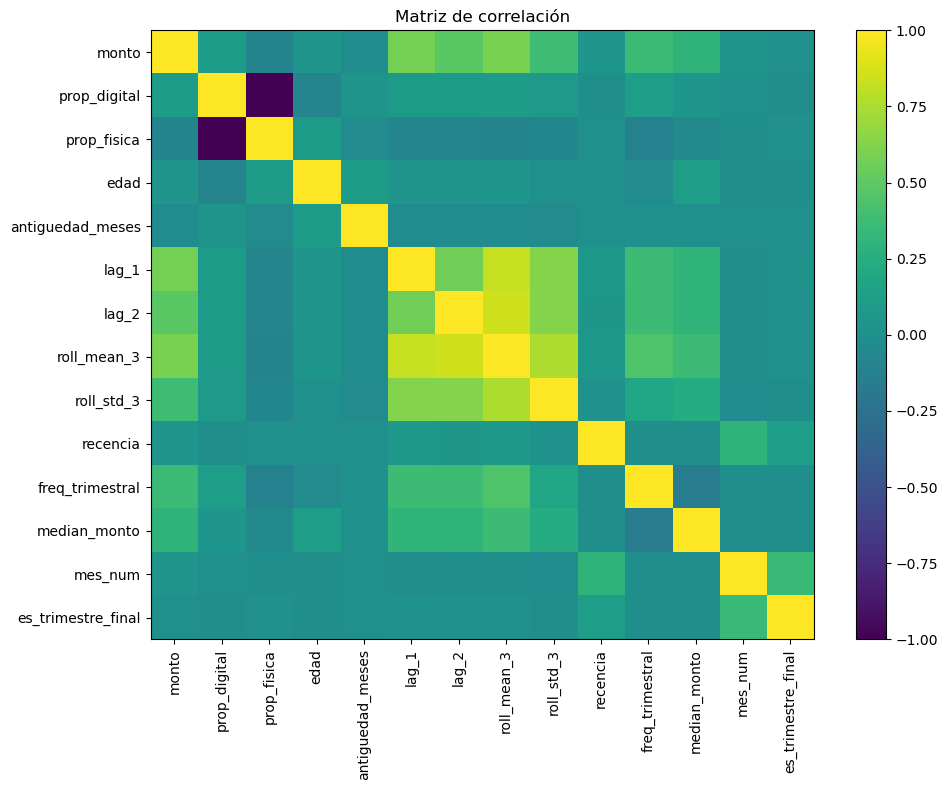

In [27]:
df_num = data.select_dtypes(include='number')
corr = df_num.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.title("Matriz de correlación")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

In [28]:
df_num = data.select_dtypes(include='number').dropna()

vif_data = pd.DataFrame({
    'variable': df_num.columns,
    'VIF': [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
})
print(vif_data)

              variable        VIF
0                monto   1.727904
1         prop_digital  26.004227
2          prop_fisica  10.142795
3                 edad   1.039444
4     antiguedad_meses   1.016265
5                lag_1   4.152021
6                lag_2   4.838899
7          roll_mean_3  13.444631
8           roll_std_3   2.629046
9             recencia   1.117861
10     freq_trimestral   1.721569
11        median_monto   1.471486
12             mes_num   1.242111
13  es_trimestre_final   1.136784


In [29]:
data = data.drop(columns=['cliente_id'])

R² en entrenamiento: 0.4293772353778247
                        |Coef|       Signo
roll_std_3          428.930805 -428.930805
freq_trimestral     425.378401  425.378401
roll_mean_3         415.855736  415.855736
median_monto        249.043424  249.043424
lag_1               246.153643  246.153643
mes_num             118.246286  118.246286
es_trimestre_final   48.897385  -48.897385
lag_2                41.687110   41.687110
edad                 31.812692   31.812692
antiguedad_meses     18.491105   18.491105
prop_digital         10.886738   10.886738
recencia              5.217349    5.217349
prop_fisica           0.000000   -0.000000


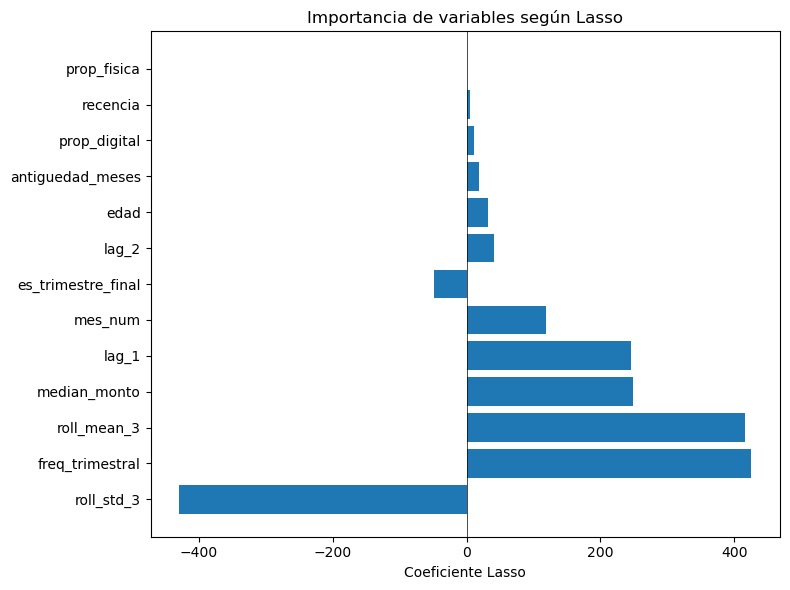

In [30]:
# Lasso

df_num = data.select_dtypes(include='number').dropna()

# Normalizar 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.075)
lasso.fit(X_scaled, y)

print("R² en entrenamiento:", lasso.score(X_scaled, y))
coefs = pd.Series(lasso.coef_, index=X.columns)

coeff_LASSO_table = coefs.abs().sort_values(ascending=False).to_frame(name='|Coef|')
coeff_LASSO_table['Signo'] = coefs.loc[coeff_LASSO_table.index]
print(coeff_LASSO_table)

plt.figure(figsize=(8, 6))
plt.barh(coeff_LASSO_table.index, coeff_LASSO_table['Signo'])
plt.xlabel("Coeficiente Lasso")
plt.title("Importancia de variables según Lasso")
plt.axvline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

In [31]:
# Tuning

param_dist = {
    'learning_rate': uniform(0.01, 0.19),
    'max_iter': randint(50, 300),
    'max_leaf_nodes': randint(10, 100),
    'min_samples_leaf': randint(20, 100)
}
hgb = HistGradientBoostingRegressor(random_state=42)
search = RandomizedSearchCV(
    hgb, param_distributions=param_dist, n_iter=20,
    scoring='neg_root_mean_squared_error', cv=tscv,
    n_jobs=-1, verbose=1, random_state=42
)
search.fit(X, y)
best_model = search.best_estimator_
print("Mejores parámetros:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros: {'learning_rate': 0.047938018610088354, 'max_iter': 104, 'max_leaf_nodes': 73, 'min_samples_leaf': 22}


In [32]:
splits = list(tscv.split(X))
train_idx, test_idx = splits[-1]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
print("RMSE final en test:", mean_squared_error(y_test, preds, squared=False))

RMSE final en test: 466.3518290886956


In [33]:
# Bootstrap de RMSE 
def bootstrap_rmse(model, X, y, n_bootstrap=100):
    rmses = []
    n = len(X)
    for _ in range(n_bootstrap):
        idx = np.random.choice(n, n, replace=True)
        X_s, y_s = X.iloc[idx], y.iloc[idx]
        tr = np.random.choice(n, int(0.8*n), replace=False)
        te = np.setdiff1d(range(n), tr)
        m = HistGradientBoostingRegressor(**model.get_params())
        m.fit(X_s.iloc[tr], y_s.iloc[tr])
        p = m.predict(X_s.iloc[te])
        rmses.append(mean_squared_error(y_s.iloc[te], p, squared=False))
    return rmses

boot_rmses = bootstrap_rmse(best_model, X_test, y_test, n_bootstrap=100)
print("Bootstrap RMSE (media, std):", np.mean(boot_rmses), np.std(boot_rmses))

Bootstrap RMSE (media, std): 373.27242516570084 107.66982045557207


In [34]:
#Probar varios modelos

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Neural Network': MLPRegressor(max_iter=500, random_state=42),
}

In [35]:
param_grids = {
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'RandomForest': {'model__n_estimators': [50,100], 'model__max_depth': [4,6]},
    'XGBoost': {'model__n_estimators': [50,100], 'model__max_depth':[3,5], 'model__learning_rate':[0.05,0.1]},
    'LightGBM': {'model__n_estimators':[50,100], 'model__max_depth':[3,5]},
    'KNN': {'model__n_neighbors': [3,5,7]},
}

def evaluate_model(model, X, y, tscv, n_bootstrap=100):
    # CV temporal
    cv_rmses = []
    for tr, te in tscv.split(X):
        m = clone(model)
        m.fit(X.iloc[tr], y.iloc[tr])
        p = m.predict(X.iloc[te])
        cv_rmses.append(mean_squared_error(y.iloc[te], p, squared=False))
    # Bootstrap sobre test fold
    train_idx, test_idx = list(tscv.split(X))[-1]
    X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
    X_te, y_te = X.iloc[test_idx], y.iloc[test_idx]
    boot_rmses = []
    n = len(X_te)
    for _ in range(n_bootstrap):
        idx = np.random.choice(n, n, replace=True)
        m = clone(model)
        m.fit(X_tr, y_tr)
        p = m.predict(X_te.iloc[idx])
        boot_rmses.append(mean_squared_error(y_te.iloc[idx], p, squared=False))
    return np.mean(cv_rmses), np.mean(boot_rmses), np.std(boot_rmses)

tscv = TimeSeriesSplit(n_splits=3)
results = []

train_idx, test_idx = list(tscv.split(X))[ -1]
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

for name, reg in models.items():
    # pipeline con imputación
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('model',   reg)
    ])
    # grid search
    if name in param_grids:
        gs = GridSearchCV(pipe, param_grids[name], scoring='neg_root_mean_squared_error',
                          cv=tscv, n_jobs=-1, verbose=0)
        gs.fit(X_train, y_train)
        best_pipe = gs.best_estimator_
    else:
        best_pipe = pipe.fit(X_train, y_train)
    # test set
    pred_test = best_pipe.predict(X_test)
    rmse_test = mean_squared_error(y_test, pred_test, squared=False)
    mae_test  = mean_absolute_error(y_test, pred_test)
    # CV y bootstrap
    cv_rmse, boot_mean, boot_std = evaluate_model(best_pipe, X, y, tscv, n_bootstrap=100)
    results.append({
        'model': name,
        'rmse_test': rmse_test,
        'mae_test': mae_test,
        'cv_rmse': cv_rmse,
        'boot_mean': boot_mean,
        'boot_std': boot_std
    })

df_results = pd.DataFrame(results).sort_values('rmse_test').reset_index(drop=True)
df_results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1031
[LightGBM] [Info] Number of data points in the train set: 447, number of used features: 13
[LightGBM] [Info] Start training from score 1327.775618
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,model,rmse_test,mae_test,cv_rmse,boot_mean,boot_std
0,LightGBM,464.615798,344.714376,883.340373,457.234038,53.810814
1,XGBoost,474.550721,347.234671,964.586084,462.034113,53.801770
2,Neural Network,478.065380,354.634451,812.057345,478.742090,58.926783
3,Elastic Net,489.371777,367.388493,859.227885,485.535904,46.398712
4,Lasso Regression,492.692375,369.618956,868.931265,492.934210,48.263875
5,Ridge Regression,493.446092,370.119453,868.762679,493.344611,44.207727
6,Linear Regression,493.594385,370.210232,869.929516,496.023092,53.341931
7,CatBoost,495.034607,353.277152,897.876082,493.595686,51.283825
8,Gradient Boosting,501.848381,363.719440,1063.558737,501.095459,56.767020
9,Random Forest,556.367432,398.233855,970.634622,548.719453,61.213429
